## Task 3 (Calculation of Inter Annotation Agreement)

In [5]:
import csv
import json

### Cohen's Kappa 

We will create a dictionary for each data point in a CSV file in the format `{'word': 'entity'}`.

The CSV file has the following columns:
- `annotation_id`
- `annotator`
- `created_at`
- `id`
- `label`
- `lead_time`
- `text`
- `updated_at`

The `label` column contains a list of dictionaries with the keys:
- `start`
- `end`
- `label`
- `text`

From these, we are interested in the `text` and `label` keys, which represent the words and their corresponding entities.


In [6]:
# Read the csv file and convert it to a list
def csv_to_dict(filename):
    with open(filename, mode='r', encoding='utf-8') as file:
        reader = csv.reader(file)
        next(reader)  # Skip the header row
        data = list(reader)
    return data

In [7]:
# Create the list of dictionaries
def create_dict(data):
    lst = []
    for i in range(len(data)):
        # Ensure the row has at least 5 columns (Skipping the blank rows)
        if len(data[i]) > 4:
            dict = {}
            # Extracting the "label" column
            label_str = data[i][4]
            if label_str:  # Checking if label_str is not empty
                # Correcting the JSON string format
                label_str = label_str.replace('""', '"')
                label = json.loads(label_str)
                # From the "label" column, extracting the "text" and "label" keys
                for j in range(len(label)):
                    # Extracting the "text" and "label" keys
                    word = label[j]['text']
                    entity = label[j]['labels'][0]
                    # Creating the dictionary
                    dict[word] = entity
            lst.append(dict)
    return lst


In [8]:
# Print the list of dictionaries
def print_dict(lst):
    for i in range(len(lst)):
        print(lst[i])

In [9]:
# Importing labels from file NER1.csv
data = csv_to_dict('NER1.csv')
lstdict1 = create_dict(data)
print_dict(lstdict1)

{'को': 'ADP', 'बंगाल': 'PROPN', 'पश्चिम': 'NOUN', 'फिर': 'ADV', 'से': 'ADP', 'देश': 'NOUN', 'के': 'ADP', 'अहम': 'ADJ', 'Trading': 'NOUN', 'और': 'CONJ', 'Industrial': 'ADJ', 'Center': 'NOUN', 'रूप': 'NOUN', 'में': 'ADP', 'विकसित': 'VERB', 'करने': 'VERB', 'लिए': 'ADP', 'हम': 'PRON', 'निरंतर': 'ADV', 'काम': 'NOUN', 'कर': 'VERB', 'रहे': 'VERB', 'हैं': 'VERB', '।': 'X'}
{'Inland': 'ADJ', 'Waterway': 'NOUN', 'Authority': 'NOUN', 'of': 'ADP', 'India': 'PROPN', ',': 'X', 'यहां': 'ADV', 'मल्टीमॉडल': 'ADJ', 'टर्मिनल': 'NOUN', 'के': 'ADP', 'निर्माण': 'NOUN', 'की': 'ADP', 'योजना': 'NOUN', 'पर': 'ADP', 'काम': 'NOUN', 'कर': 'VERB', 'रही': 'VERB', 'है': 'VERB', '।': 'X'}
{'पर्यटन': 'NOUN', 'मंत्रालय': 'NOUN', 'के': 'ADP', 'regional': 'ADJ', 'office': 'NOUN', 'महीने': 'NOUN', 'ने': 'ADP', 'शुरू': 'NOUN', 'गाँवों': 'NOUN', 'Gateway': 'NOUN', 'शुरुआत': 'NOUN', 'में': 'ADP', 'की': 'X', 'ही': 'PART', 'बंगाल': 'PROPN', 'एक': 'DET', 'Incredible': 'ADJ', 'India': 'PROPN', '।': 'X', 'Weekend': 'PROPN'}
{'इसमे

In [10]:
# Importing labels from file NER2.csv
data = csv_to_dict('NER2.csv')
lstdict2 = create_dict(data)
print_dict(lstdict2)

{'पश्चिम': 'PROPN', 'बंगाल': 'PROPN', 'को': 'ADP', 'फिर': 'ADV', 'से': 'ADP', 'देश': 'ADV', 'के': 'NOUN', 'अहम': 'ADJ', 'Trading': 'NOUN', 'और': 'CONJ', 'Industrial': 'ADJ', 'Center': 'NOUN', 'रूप': 'ADP', 'में': 'ADP', 'विकसित': 'VERB', 'करने': 'VERB', 'के लिए': 'ADP', 'हम': 'PRON', 'निरंतर': 'ADV', 'काम': 'ADV', 'कर': 'ADV', 'रहे': 'VERB', 'हैं': 'VERB', '।': 'X'}
{'मल्टीमॉडल': 'ADJ', 'की': 'ADP', 'के': 'ADP', 'पर': 'ADP', 'यहां': 'ADV', 'टर्मिनल': 'NOUN', 'निर्माण': 'NOUN', 'योजना': 'NOUN', 'काम': 'VERB', 'Inland': 'PROPN', 'Waterway': 'PROPN', 'Authority': 'PROPN', 'India': 'PROPN', 'कर': 'VERB', 'रही': 'VERB', 'है': 'VERB', 'of': 'X', '।': 'X'}
{'regional': 'ADJ', 'शुरू': 'ADJ', 'Incredible': 'ADJ', 'के': 'ADP', 'की': 'VERB', 'में': 'ADP', 'ही': 'ADV', 'एक': 'VERB', 'मंत्रालय': 'NOUN', 'office': 'NOUN', 'महीने': 'NOUN', 'बंगाल': 'NOUN', 'गाँवों': 'NOUN', 'शुरुआत': 'NOUN', 'India': 'PROPN', 'Weekend': 'PROPN', 'Gateway': 'PROPN', 'ने': 'VERB', 'शुरुआत की': 'VERB', 'पर्यटन': 'PROPN'

##### Cohen's Kappa calculation:

The formula for Cohen's Kappa is:
$$ \text{Kappa} = \frac{P_o - P_e}{1 - P_e} $$

Where:
- $ P_o $ is the observed agreement among annotators.
- $ P_e $ is the expected agreement.

In [11]:
labellist=["NOUN", "PROPN", "VERB", "ADJ", "ADV", "ADP", "PRON", "DET", "CONJ", "PART", "PRON_WH", "PART_NEG", "NUM", "X"]

# Make a matrix for IIA
matrix = [[0 for i in range(len(labellist))] for j in range(len(labellist))]

for i in range(len(lstdict1)):
    for key, value in lstdict1[i].items():
        for key2, value2 in lstdict2[i].items():
            if key == key2:
                matrix[labellist.index(value)][labellist.index(value2)] += 1
            
# Print the matrix
for i in range(len(labellist)):
    print(matrix[i])


[92, 15, 1, 11, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[9, 31, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3]
[4, 0, 52, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 2, 1, 32, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 11, 3, 0, 0, 0, 0, 2, 0, 0, 0]
[2, 1, 3, 0, 0, 52, 3, 0, 0, 0, 0, 0, 0, 1]
[0, 0, 0, 0, 0, 0, 20, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 3, 2, 0, 1, 1, 0, 0, 0, 0, 2, 0]
[0, 0, 0, 0, 0, 1, 0, 0, 9, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 5, 1, 0, 0, 0, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 29]


In [12]:
# Cohen's Kappa calculation

n=0
for i in range(len(labellist)):
    for j in range(len(labellist)):
        n += matrix[i][j]

# Po
Po=0
for i in range(len(labellist)):
    Po += matrix[i][i]

Po = Po/n
print("Po: ", Po)

# Pe
Pe=0
matrixtranspose = [[matrix[j][i] for j in range(len(matrix))] for i in range(len(matrix[0]))] # Transpose of matrix
for i in range(len(labellist)): 
    Pe += (sum(matrix[i])*sum(matrixtranspose[i]))

Pe = Pe/(n*n)
print("Pe: ", Pe)

# Kappa
kappa=(Po-Pe)/(1-Pe)
print("Cohen's Kappa:",kappa)

Po:  0.7947494033412887
Pe:  0.1478802239677377
Cohen's Kappa: 0.7591294059452268


The Agreement is estimated from the following table according to the value of Cohen's kappa:

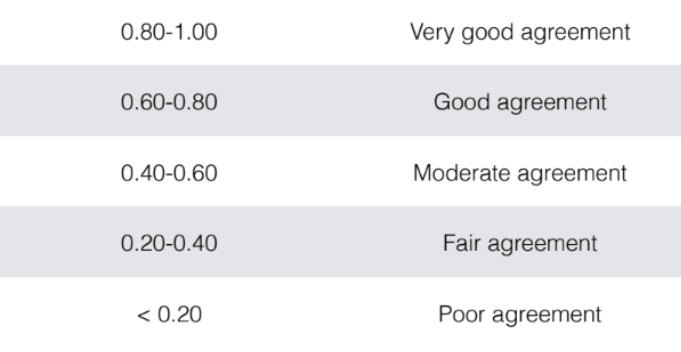

Thus, the agreement is **Good**

### Fliess' Kappa 

For the CV CSV files, we make a list of labels for each image.

The labels are:
- `annotation_id`
- `annotator`
- `choice`
- `created_at`
- `id`
- `image`
- `lead_time`
- `updated_at`

Of these, we are interested in the `choice` column, which contains our 'labels'.

##### Importing files:

In [13]:
def create_label_list(data):
    lst = []
    for i in range(len(data)):
        # Ensure the row has at least 5 columns (Skipping the blank rows)
        if len(data[i]) > 4:
            # Extracting the "choice" column
            if data[i][2]:  # Checking if choice is not empty
                label = data[i][2]
                lst.append(label)
    return lst

In [14]:
# Importing data from file CV1.csv
data = csv_to_dict('CV1.csv')
labelscv1 = create_label_list(data)
print(labelscv1)

# File 2 and 3
data = csv_to_dict('CV2.csv')
labelscv2 = create_label_list(data)
print(labelscv2)

data = csv_to_dict('CV3.csv')
labelscv3 = create_label_list(data)
print(labelscv3)

['No Trucks', 'No Trucks', 'No Trucks', 'No Trucks', 'No Trucks', 'Trucks', 'No Trucks', 'No Trucks', 'No Trucks', 'No Trucks', 'Trucks', 'No Trucks', 'No Trucks', 'Trucks', 'Trucks', 'No Trucks', 'No Trucks', 'No Trucks', 'Trucks', 'No Trucks']
['No Trucks', 'No Trucks', 'No Trucks', 'No Trucks', 'Trucks', 'Trucks', 'No Trucks', 'No Trucks', 'Trucks', 'No Trucks', 'Trucks', 'No Trucks', 'No Trucks', 'Trucks', 'No Trucks', 'No Trucks', 'No Trucks', 'No Trucks', 'Trucks', 'No Trucks']
['No Trucks', 'No Trucks', 'No Trucks', 'Trucks', 'No Trucks', 'Trucks', 'No Trucks', 'No Trucks', 'Trucks', 'No Trucks', 'Trucks', 'No Trucks', 'No Trucks', 'Trucks', 'No Trucks', 'No Trucks', 'No Trucks', 'Trucks', 'Trucks', 'No Trucks']


#### Fliess' Kappa calculation:

##### Formula for Fliess' kappa:


- **Definition**  
  $$ \kappa = \frac{P_o - P_e}{1 - P_e} $$

- **Average agreement among all items**  
  $$ P_o = \frac{1}{N} \sum_{i=1}^{N} P_i $$

- **Number of annotators (pairs) who assign category (*j*) to item (*i*)**  
  $$ n_{ij} $$

- **Probability of category (*j*)**  
  $$ p_j = \frac{1}{Nn} \sum_{i=1}^{N} n_{ij} $$

- **Expected agreement by chance**  
  $$ P_e = \sum_{j=1}^{K} p_j^2 $$

- **For item (*i*) with (*n*) annotations, how many annotators (pairs) agree, among all (*n(n-1)*) possible pairs**  
  $$ P_i = \frac{1}{n(n-1)} \sum_{j=1}^{K} n_{ij}(n_{ij} - 1) $$

In [15]:
# Fliess' kappa

combinedlist=[labelscv1,labelscv2,labelscv3] # Combining the labels from all the annotators for easier iteration

N = len(labelscv1) # Number of images
n = len(combinedlist) # Number of annotators

Po=0
ttrucks=0 # Total number of trucks agreed pairs
tnotrucks=0 # Total number of notrucks agreed pairs

for k in range(N): # Iterating over the images
    trucks=0
    notrucks=0

    # Iterating over the annotators pairs
    for i in range(len(combinedlist)-1):
        for j in range(i+1, len(combinedlist)):
            # Calculating the number of annotator pairs that assign same label (j) to the same image (i) (nij)
            if combinedlist[i][k] == combinedlist[j][k] == "Trucks":
                trucks+=1
            elif combinedlist[i][k] == combinedlist[j][k] == "No Trucks":
                notrucks+=1
    
    # Calculating the proportion of agreement for the image (Pi)
    Pi=(trucks*(trucks-1)+notrucks*(notrucks-1))/((n)*(n-1))
    Po+=Pi

    ttrucks+=trucks
    tnotrucks+=notrucks
    
Po=Po/N
print("The value of Po:",Po)

Pe=(ttrucks**2+tnotrucks**2)/(n**2*N**2)
print("The value of Pe:",Pe)

kappa=(Po-Pe)/(1-Pe)
print("The value of Fliess' kappa is:",kappa)

The value of Po: 0.75
The value of Pe: 0.4272222222222222
The value of Fliess' kappa is: 0.5635305528612996


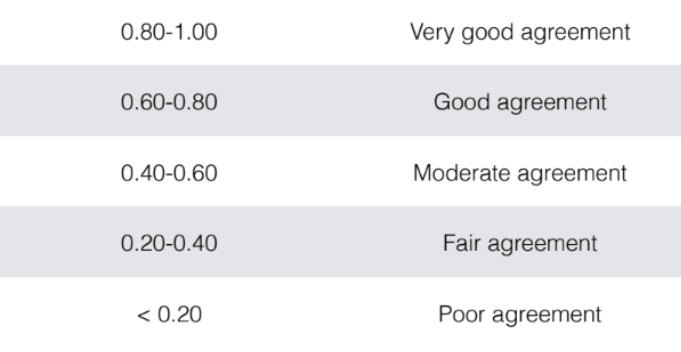

From the table we can say that the agreement is **Moderate**

**Observations:**

- The value of $P_i$ will be 1 if all three annotators agree and 0 otherwise (Because there are only 3 annotators)

- The $P_o$ value shows that there were $P_o$ $\times$ 20 images where all annotators agreed. Here it is 15. 

- Thus, the agreement calculated using Fliess kappa does not give very accurate results for just 3 annotators and 2 labels.